In [18]:
import pandas as pd
file1=pd.read_csv('names2016_final.csv')
file=file1.iloc[:,[2,3]]
file

,soil_moisture_01,surface_temperature_01
0,0.000000,33.485132
1,0.472564,25.995691
2,0.000000,32.843530
3,0.000000,11.762964
4,0.202078,21.484674
...,...,...
15842,0.196774,21.373560
15843,0.000000,28.256433
15844,0.278682,28.604364
15845,0.000000,31.567560


In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler=RobustScaler()
x = scaler.fit_transform(file.values)

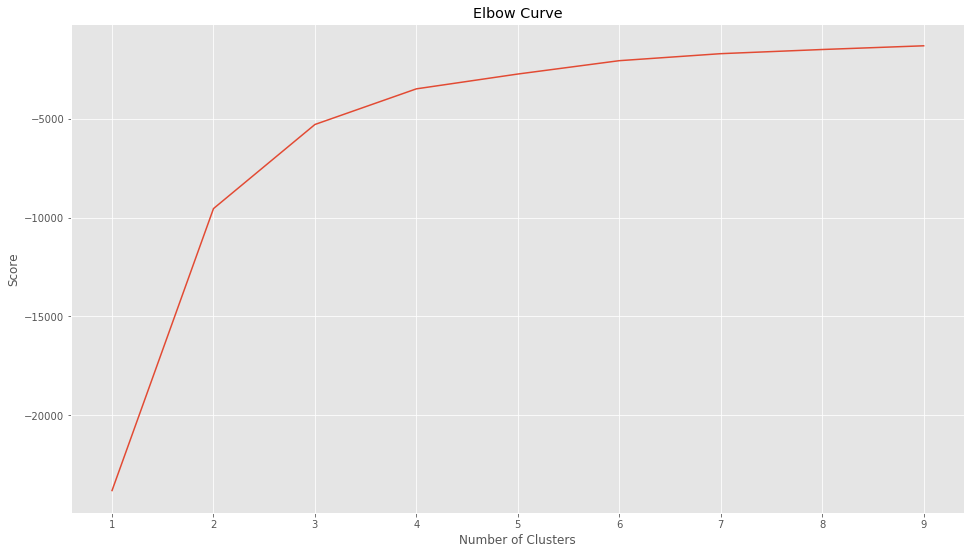

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.11009022 -0.82626924]
 [ 2.5729891  -0.01295346]
 [ 0.22049293  0.35592055]]


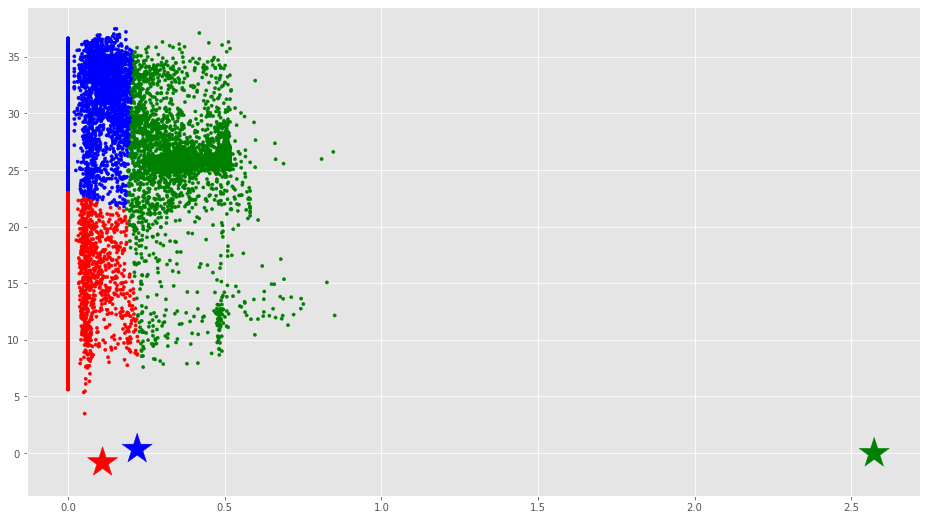

In [35]:
labels = kmeans.predict(x)
# Getting the cluster centers
C = kmeans.cluster_centers_
#C=pca.inverse_transform(C)
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

#X=pca.inverse_transform(principalComponents)   

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

f1 = file['soil_moisture_01'].values
f2 = file['surface_temperature_01'].values
 
plt.scatter(f1, f2, c=asignar, s=10)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [36]:
labels

array([2, 1, 2, ..., 1, 2, 1])

In [37]:
file1['Unnamed: 4']=labels

In [22]:
file1.to_csv('sa_classified.csv')

In [38]:
labels1=labels
for i,val in enumerate(labels1):
    if val==2:
        labels1[i]=1
    else:
        labels1[i]=0

In [39]:
labels1

array([1, 0, 1, ..., 0, 1, 0])

In [40]:
file1['Unnamed: 4']=labels1

In [41]:
file1.to_csv('sa_class.csv')

In [43]:
file2=file1.iloc[:,[2,3,4]]

In [44]:
file2

,soil_moisture_01,surface_temperature_01,Unnamed: 4
0,0.000000,33.485132,1
1,0.472564,25.995691,0
2,0.000000,32.843530,1
3,0.000000,11.762964,0
4,0.202078,21.484674,0
...,...,...,...
15842,0.196774,21.373560,0
15843,0.000000,28.256433,1
15844,0.278682,28.604364,0
15845,0.000000,31.567560,1


In [46]:
X = file2.drop('Unnamed: 4', axis=1)
scaler=RobustScaler()
X = scaler.fit_transform(X.values)
y = file2['Unnamed: 4']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [48]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
y_pred = svclassifier.predict(X_test)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [51]:
y_test

14094    0
3172     0
6812     0
872      0
15041    0
        ..
5033     1
8320     1
905      0
6795     0
1321     1
Name: Unnamed: 4, Length: 4755, dtype: int32

In [55]:
file1.iloc[y_test.index,:].to_csv('realidad.csv')

In [56]:
file3=file1.iloc[y_test.index,:]
file3['Unnamed: 4']=y_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
file3.to_csv('prediccion.csv')

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2331  117]
 [  93 2214]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2448
           1       0.95      0.96      0.95      2307

    accuracy                           0.96      4755
   macro avg       0.96      0.96      0.96      4755
weighted avg       0.96      0.96      0.96      4755

